<a href="https://colab.research.google.com/github/KumudaBG/DeepLearning-Assignment3/blob/main/c2_tensorflow_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf

In [48]:
n  = 270
d = 3
x = tf.random.uniform((n, d), -1, 1)
x2 = tf.cast(x**2, tf.float32)
weights_true = tf.cast(tf.constant([[5,1,2],[2,2,1]]), tf.float32)
bias_true = tf.cast(tf.constant([2,1]), tf.float32)
y_true = tf.matmul(x2, weights_true, transpose_b=True) + tf.matmul(x,weights_true,transpose_b=True) + bias_true

print(f'y: {y_true.shape}')

y: (270, 2)


#Visualization

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
def plot_3d(title, X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y, label='y_true')
  ax.set_title(title)
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred, label='y_pred', marker='v')
  plt.legend()
  plt.show()

In [50]:
import plotly.graph_objects as pltgo
def plot_go_3d(x, y, y_pred=None):
  
  fig = pltgo.Figure()
  fig.add_trace(pltgo.Scatter3d(x = x[:,0], y = x[:,1], z = y.reshape([-1]),
                    name='y_true', mode='markers', marker=dict( size=10, color='dodgerblue', colorscale='Viridis', opacity=0.5)))
  if y_pred is not None:
    fig.add_trace(pltgo.Scatter3d(x = x[:,0], y = x[:,1], z = y_pred.reshape([-1]),
                   name='y_pred', mode='markers', marker=dict( size=10, color='goldenrod', colorscale='Viridis', opacity=0.5)))
  fig.update_layout(margin=dict(r=20, b=10, l=10, t=10))
  fig.show()

In [51]:
X = TSNE(n_components=2).fit_transform(x)
Y = TSNE(n_components=1).fit_transform(y_true)
plot_go_3d(X,Y)

#Nueral network using Tensorflow

Linear layer

In [52]:

from tensorflow.keras.layers import Layer
class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

In [53]:
class MLP(Layer):
    """Simple stack of Linear layers."""

    def __init__(self):
        super(MLP, self).__init__()
        self.linear_1 = Linear(22)
        self.linear_2 = Linear(12)
        self.linear_3 = Linear(2)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

In [54]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
mse_loss_fn = tf.keras.losses.MeanSquaredError()
loss_metric = tf.keras.metrics.Mean()

dataset = tf.data.Dataset.from_tensor_slices((x, y_true))
dataset = dataset.shuffle(buffer_size=1).batch(30)

epochs = 1000
mlp = MLP()

for epoch in range(epochs):
    for step, (x_batch, y_batch) in enumerate(dataset):
        with tf.GradientTape() as tape:
            y_pred_batch = mlp(x_batch)
            loss = mse_loss_fn(y_batch, y_pred_batch)
            loss += sum(mlp.losses)

        grads = tape.gradient(loss, mlp.trainable_weights)
        optimizer.apply_gradients(zip(grads, mlp.trainable_weights))

        loss_metric(loss)
    if epoch % 50 == 0:
      print(f'Epoch {epoch}, loss {loss_metric.result()}')

Epoch 0, loss 20.632556915283203
Epoch 50, loss 16.214635848999023
Epoch 100, loss 13.426755905151367
Epoch 150, loss 11.53250789642334
Epoch 200, loss 9.98379135131836
Epoch 250, loss 8.472753524780273
Epoch 300, loss 7.3285136222839355
Epoch 350, loss 6.482107162475586
Epoch 400, loss 5.828709602355957
Epoch 450, loss 5.306518077850342
Epoch 500, loss 4.879243850708008
Epoch 550, loss 4.522454261779785
Epoch 600, loss 4.219694137573242
Epoch 650, loss 3.9594473838806152
Epoch 700, loss 3.7331302165985107
Epoch 750, loss 3.5344133377075195
Epoch 800, loss 3.3583762645721436
Epoch 850, loss 3.201117753982544
Epoch 900, loss 3.059603452682495
Epoch 950, loss 2.9313886165618896


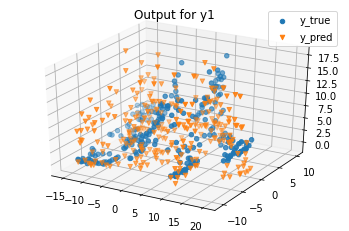

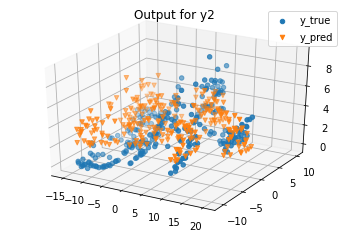

In [55]:
plot_3d('Output for y1', x, y_true[:,0], y_pred[:,0])
plot_3d('Output for y2', x, y_true[:,1], y_pred[:,1])

In [56]:
X_plot = TSNE(n_components=2).fit_transform(x)
y_true_plot = TSNE(n_components=1).fit_transform(y_true)
y_pred_plot = TSNE(n_components=1).fit_transform(y_pred)
plot_go_3d(X_plot,y_true_plot,y_pred_plot)